In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from MatrixFactorization import MatrixFactorization as mf
from CollaborativeFiltering import CollaborativeFiltering as cb

In [2]:
movie_ratings = pd.read_csv('./dataset/ratings.csv')
movie_ratings_small = pd.read_csv('./dataset/ratings_small.csv')
movies_metadata = pd.read_csv('./dataset/movies_metadata.csv')

/var/folders/s7/_6xph2kx7zj1t3c3tmb0gk5c0000gn/T/ipykernel_12397/2452708455.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('./dataset/movies_metadata.csv')


In [3]:
movie_ratings_small.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [4]:
movie_ratings.shape, movie_ratings_small.shape

((26024289, 4), (100004, 4))

In [5]:
movies_metadata = movies_metadata.drop_duplicates(subset='id', keep='first')

In [6]:
movies_metadata = movies_metadata[movies_metadata['id'].str.isdigit()]
movies_metadata['id'] = movies_metadata['id'].astype('int64')

<ipython-input-6-7420a33fdfa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['id'] = movies_metadata['id'].astype('int64')


In [26]:
# 두 데이터프레임 병합 (movieId 기준)
movies_total= movies_metadata.merge(movie_ratings,
                                        left_on='id',
                                        right_on='movieId',
                                        how='left')

# 필요 없어진 movieId 열 제거
movies_total = movies_total.drop(columns=['movieId'])


In [27]:
movies_total.shape

(11474436, 27)

In [28]:
movies_total.dropna(subset='userId', inplace=True)

In [22]:
movies_total['userId'] = movies_total['userId'].astype('int64')

In [23]:
a =movies_total[['id','original_title','userId', 'rating']]
a.head()

id original_title  userId  rating
5  949           Heat      23     3.5
6  949           Heat     102     4.0
7  949           Heat     232     2.0
8  949           Heat     242     5.0
9  949           Heat     263     3.0

In [24]:
user_matrix = pd.pivot_table(a, index="userId", columns='original_title',values='rating',aggfunc="mean", fill_value=0)
user_matrix

original_title  !Women Art Revolution  'Gator Bait  \
userId                                               
1                                 0.0          0.0   
2                                 0.0          0.0   
3                                 0.0          0.0   
4                                 0.0          0.0   
5                                 0.0          0.0   
...                               ...          ...   
667                               0.0          0.0   
668                               0.0          0.0   
669                               0.0          0.0   
670                               0.0          0.0   
671                               0.0          0.0   

original_title  'Twas the Night Before Christmas  ...Più forte ragazzi!  \
userId                                                                    
1                                            0.0                    0.0   
2                                            0.0                    0.0   
3                                            0.0                    4.5   
4                                            0.0                    0.0   
5                                            0.0                    4.0   
...                                          ...                    ...   
667                                          0.0                    0.0   
668                                          0.0                    0.0   
669                                          0.0                    0.0   
670                                          0.0                    0.0   
671                                          0.0                    0.0   

original_title  00 Schneider - Jagd auf Nihil Baxter  10 Items or Less  \
userId                                                                   
1                                                0.0               0.0   
2                                                0.0               0.0   
3                                                0.0               0.0   
4                                                0.0               0.0   
5                                                0.0               0.0   
...                                              ...               ...   
667                                              0.0               0.0   
668                                              0.0               0.0   
669                                              0.0               0.0   
670                                              0.0               0.0   
671                                              0.0               0.0   

original_title  10 Things I Hate About You  10,000 BC  \
userId                                                  
1                                      0.0        0.0   
2                                      0.0        0.0   
3                                      0.0        0.0   
4                                      0.0        0.0   
5                                      0.0        0.0   
...                                    ...        ...   
667                                    0.0        0.0   
668                                    0.0        0.0   
669                                    0.0        0.0   
670                                    0.0        0.0   
671                                    0.0        0.0   

original_title  11'09''01 - September 11  12 + 1  ...  사마리아   야수  연가시  오직 그대만  \
userId                                            ...                           
1                                    0.0     0.0  ...   0.0  0.0  0.0     0.0   
2                                    0.0     0.0  ...   0.0  0.0  0.0     0.0   
3                                    0.0     0.0  ...   0.0  0.0  0.0     0.0   
4                                    0.0     0.0  ...   0.0  0.0  0.0     0.0   
5                                    0.0     0.0  ...   0.0  0.0  0.0     0.0   
...                                  ...     ... 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

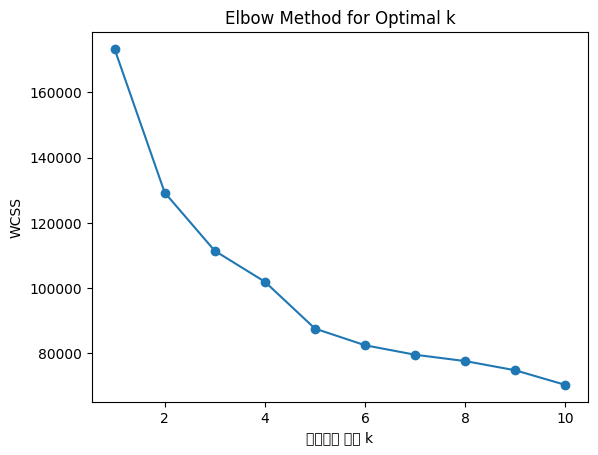

In [25]:
#kmeans를 사용하여 사용자-아이템 메트릭스를 클러스터링을 먼저 시행한다.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# 예제 데이터 (사용자-아이템 행렬)
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(user_matrix)

wcss = []
for k in range(1, 11):  # k를 1부터 10까지 테스트
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=500)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS 값

# 그래프 그리기
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('클러스터 개수 k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

Text(0, 0.5, 'Silhouette Score')

/Users/chahyeon-yeong/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chahyeon-yeong/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chahyeon-yeong/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chahyeon-yeong/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chahyeon-yeong/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ch

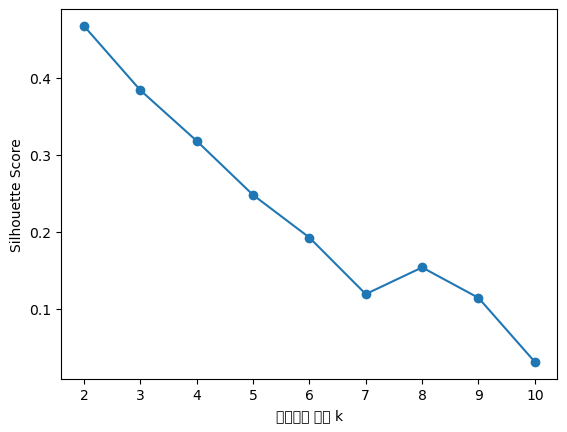

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(user_matrix)
silhouette_scores = []
# Silhouette Score 계산을 위한 샘플링 비율 설정 (예: 10% 샘플링)
sample_ratio =1
X_sampled = X_reduced[np.random.choice(X_reduced.shape[0], int(X_reduced.shape[0] * sample_ratio), replace=False)]
for k in range(2, 11):  # k=1은 의미 없으므로 2부터 시작
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=200, n_init=1)
    cluster_labels = kmeans.fit_predict(X_sampled)
    score = silhouette_score(X_sampled, cluster_labels)
    silhouette_scores.append(score)

# 그래프 그리기
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('클러스터 개수 k')
plt.ylabel('Silhouette Score')

In [ ]:
mf = mf(user_matrix)
k_values = [100, 200, 300, 400,500]  # 실험할 k 값 리스트
for k in k_values:
    actual_items, predicted_items = mf.predict(k, top_k=10)
    precision = mf.precision_at_k(actual_items, predicted_items)
    print(f"k={k}, Precision: {precision:.4f}")


k=100, Precision: 0.9106
k=200, Precision: 0.9610
k=300, Precision: 0.9741
k=400, Precision: 0.9799
k=500, Precision: 0.9832


In [ ]:
k_values = [100, 200, 300, 400,500]  # 실험할 k 값 리스트
for k in k_values:
    actual_items, predicted_items = mf.predict(k, top_k=10)
    recall = mf.recall_at_k(actual_items, predicted_items)
    print(f"k={k}, Recall: {recall:.4f}")

k=100, Recall: 0.2993
k=200, Recall: 0.3369
k=300, Recall: 0.3515
k=400, Recall: 0.3572
k=500, Recall: 0.3605


In [14]:
# 특정 사용자에 대해 유사도 계산
k = 2 # 위의결과로 설정됨
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=500)
user_clusters = kmeans.fit_predict(user_matrix)
unique_clusters = np.unique(user_clusters)

user_id = 0  # 예: 첫 번째 사용자
cluster= user_clusters[0]

top_k = 10

cluster_indices = np.where(user_clusters == cluster)[0]  # 해당 클러스터 사용자 인덱스
cluster_matrix = user_matrix.iloc[cluster_indices]
optimal_k = 100
cb_= cb(cluster_matrix, optimal_k)
similarities = cb_.calculate_pearson_similarity(user_id)

In [15]:
#similarities
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
print(sorted_similarities)

[(51525, 0.7879723784850775), (10709, 0.7646286900447629), (152987, 0.723308637449746), (124596, 0.7194693807958), (39521, 0.7161772738515253), (63165, 0.6929194881080528), (52732, 0.6884913325931975), (59958, 0.6783646485867268), (140929, 0.6779326445869528), (55740, 0.6696733932695615), (197548, 0.6672658373792079), (194741, 0.6667230991377137), (10153, 0.6662557756308534), (162817, 0.6662240792152299), (17152, 0.659606888114666), (161011, 0.6591179153144684), (84434, 0.6571267972193965), (86129, 0.6557100745233089), (136604, 0.6554235335687439), (176214, 0.6529570589143817), (117778, 0.6520967926207413), (191233, 0.6508630915988136), (229825, 0.6504627583800174), (59255, 0.6502293633043681), (228206, 0.6498191854587152), (38443, 0.649398624297473), (116518, 0.6482799365849411), (147177, 0.6470648628929653), (139164, 0.6467933635600134), (106945, 0.6453856762269158), (224319, 0.6435223955252871), (134817, 0.6432850202199152), (137340, 0.6428757509117141), (10893, 0.6427792302433304),

In [16]:
item_id = "장화, 홍련"
user_id = 1
predicted_rating = cb_.user_based_predict(user_id, item_id, similarities)
print(f"사용자 {user_id}가 '{item_id}'에 부여할 예측 평점: {predicted_rating}")

사용자 1가 '장화, 홍련'에 부여할 예측 평점: 4.045454545454546
